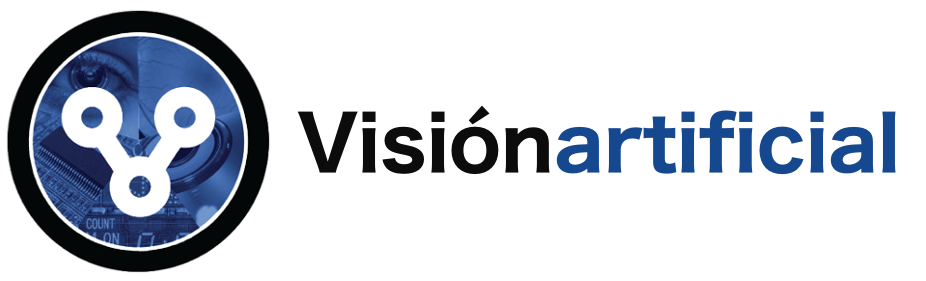

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos BRISK</font>

O detector de puntos clave BRISK, introducido por Leutenegger, et al. no seu artigo ICCV de 2011, [BRISK: Binary Robust Invariant Scalable Keypoint](./artigos/leutenegger_2011.pdf), é unha extensión do detector de puntos clave FAST e ten como obxectivo abordar unha limitación crítica de FAST: **a invariancia do espazo de escala**.
Obxectivos:





# <font style="color:rgb(50,120,229)">Obxectivo:</font>
Neste caderno,  exploraremos o detector de puntos clave BRISK e salva a invariancia ao cambio de escalas.



# <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave BRISK?</font>

A implementación orixinal de FAST de Rosten e Drummond (2005) só examina a imaxe a unha escala única, o que significa que era improbable que os puntos clave puidesen atoparse noutras versión da imaxe con cambio na escala.

BRISK é capaz de resolver esta limitación creando imaxes espaciais a escala, semellante a DoG. O proceso xeral é reducir á metade o tamaño da imaxe para cada capa da pirámide:

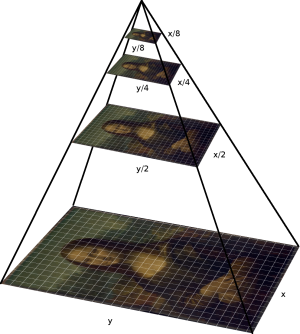

Entón, para cada capa da pirámide, execútase o detector de puntos clave FAST estándar, coa resposta máxima (é dicir, as rexións máis probables de ser unha "esquina" tómanse en todos os niveis da pirámide da imaxe). Como recordatorio, é como FAST determina se unha rexión é unha "esquina" ou non:

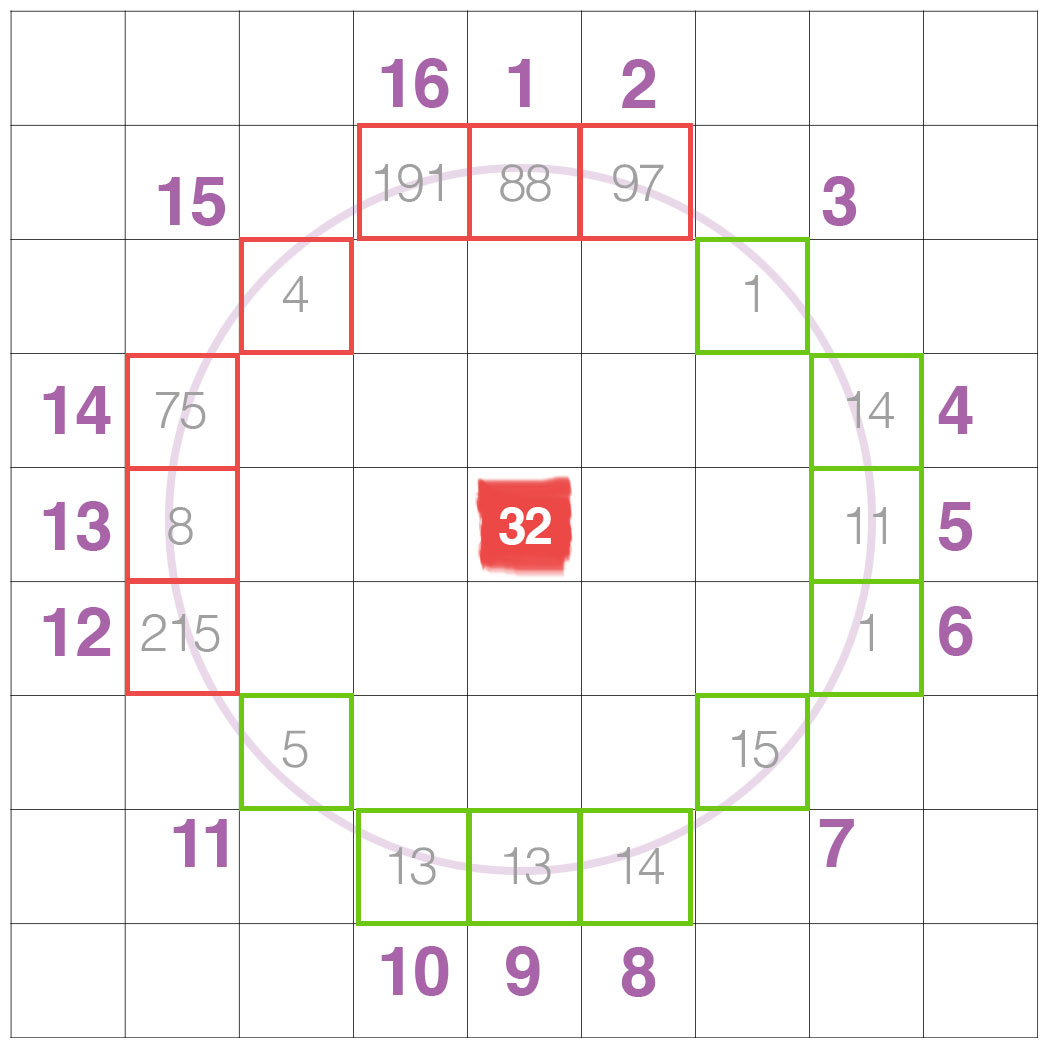

FAST mira os valores de intensidade dos píxeles que rodean ao central **p**. Se n píxeles contiguos son todos maiores ou máis pequenos que o píxel central, entón a rexión márcase como un punto clave.

Baixo o capó, BRISK utiliza o detector de puntos clave FAST utilizando un contorno circular de 16 píxeles e utiliza a proba rápida con n = 9 píxeles verificar o requisito contiguidade. Se polo menos 9 píxeles consecutivos, neste círculo de 16 píxeles, cumpren o requisito do limiar, entón o píxel central marcarase como un punto clave. Este proceso repítese para cada capa da pirámide.

Entón, como podes ver, o detector de puntos clave BRISK é unha extensión bastante sinxela do detector de puntos clave FAST. Non obstante, o principal beneficio do uso de BRISK é que a invariancia do espazo de escala engade un custo lixeiramente modesto. BRISK aínda pode ser axeitado para a aplicación en tempo real, polo que sempre que esteas pensando en usar FAST, tamén podes probar BRISK e ver se o rendemento mellora.


## Que detecta BISK?

BRISK, ao ser unha extensión de FAST, detecta esquinas, bordes ou ambos pero con robustez ao cambio de escala na imaxe.



Vexamos como se poden obter estes puntos con OpenCV:

In [4]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# de keypoints: 938


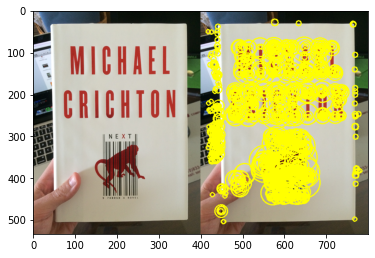

In [6]:
#cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


#  BRISK para OpenCV 3+
detector = cv2.BRISK_create()
kps = detector.detect(gray, None)
print("# de keypoints: {}".format(len(kps)))

# lazo sobre puntos de interes e os debuxamos
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));